In [124]:
from sklearn.datasets import load_iris
import tensorflow as tf
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from keras import utils
import matplotlib.pyplot as plt

In [125]:
iris= load_iris()

In [126]:
print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape)
print(iris.target.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


In [127]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [128]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [129]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
 columns= iris['feature_names'] + ['Species'])

In [130]:
df['Species'].value_counts()

0.0    50
1.0    50
2.0    50
Name: Species, dtype: int64

In [131]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [132]:
def separator(df):
    train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])
    train_target = train.pop('Species').astype(int)    
    validate_target = validate.pop('Species').astype(int)
    test_target = test.pop('Species').astype(int)    
    return (train, train_target), (validate, validate_target), (test, test_target)

In [133]:
(train_data, train_target), (valid_data,valid_target), (test_data, test_target) = separator(df)

In [134]:
train_data.shape

(90, 4)

In [135]:
def build_model_1():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [136]:
model_1 = build_model_1()
history_1 = model_1.fit(train_data, train_target, epochs=100, validation_data=(valid_data,valid_target), verbose=0)

In [137]:
def plot_fit(epochs,train,validate):
    plt.plot(epochs, train, 'b', label='Training')
    plt.plot(epochs, validate, '--', label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

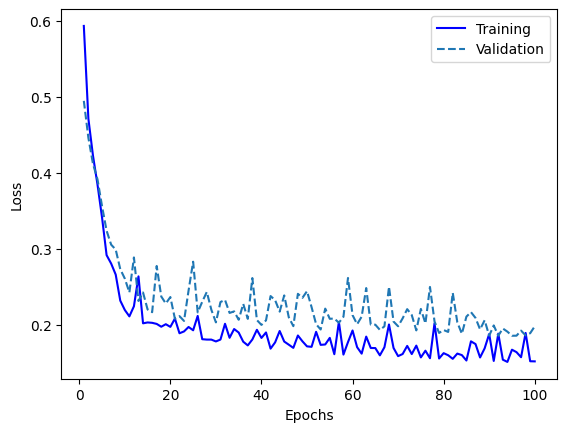

In [138]:
mae_history = history_1.history['mae']
val_mae_history = history_1.history['val_mae']
epochs = range(1, len(mae_history) + 1)
plot_fit(epochs,mae_history,val_mae_history)

In [139]:
test_mse_score, test_mae_score = model_1.evaluate(test_data,test_target, verbose=2)

1/1 - 0s - loss: 0.0358 - mae: 0.1512 - 49ms/epoch - 49ms/step


In [140]:
def build_model_2():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["mae"])
    return model

In [156]:
spare_train_target =  np.array([[x] for x in train_target])
spare_valid_target = np.array([[x] for x in valid_target])
spare_test_target = np.array([[x] for x in test_target])

In [157]:
model_2 = build_model_2()
history_2 = model_2.fit(train_data, spare_train_target, epochs=100, validation_data=(valid_data,spare_valid_target), verbose=0)

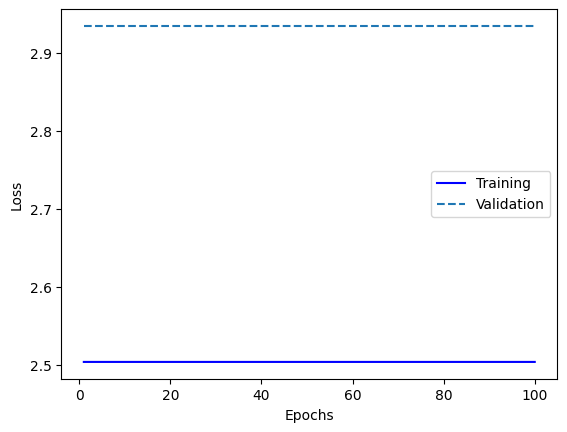

In [158]:
mae_history = history_2.history['mae']
val_mae_history = history_2.history['val_mae']
epochs = range(1, len(mae_history) + 1)
plot_fit(epochs,mae_history,val_mae_history)

In [159]:
test_mse_score, test_mae_score = model_2.evaluate(test_data,test_target, verbose=2)

1/1 - 0s - loss: nan - mae: 3.0125 - 39ms/epoch - 39ms/step


sparse_categorical_crossentropy не работает, лучше использовать categorical_crossentropy

In [160]:
def build_model_3():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["mae"])
    return model

In [161]:
categorical_train_target = utils.to_categorical(train_target,num_classes=3)
categorical_valid_target = utils.to_categorical(valid_target,num_classes=3)
categorical_test_target = utils.to_categorical(test_target,num_classes=3)

In [162]:
model_3 = build_model_3()
history_3 = model_3.fit(train_data, categorical_train_target, epochs=100, validation_data=(valid_data,categorical_valid_target), verbose=0)

ValueError: in user code:

    File "c:\Users\User\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\User\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\User\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\User\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\User\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\User\.conda\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\User\.conda\envs\tf\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\User\.conda\envs\tf\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\User\.conda\envs\tf\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\User\.conda\envs\tf\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 3) and (None, 1) are incompatible


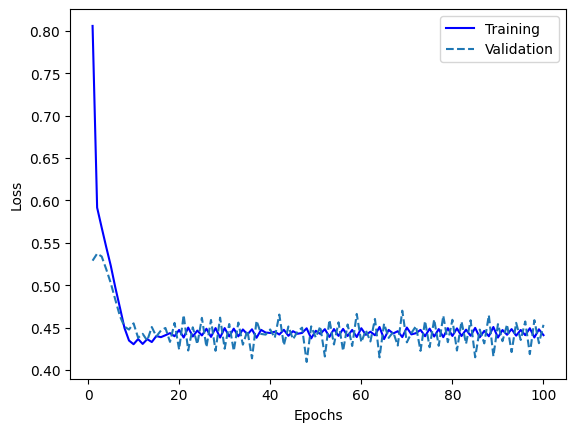

In [148]:
mae_history = history_3.history['mae']
val_mae_history = history_3.history['val_mae']
epochs = range(1, len(mae_history) + 1)
plot_fit(epochs,mae_history,val_mae_history)